In [1]:
import numpy as np 
import os
import pandas as pd

import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/CMF/data/lumargot/hysterectomy/mnt/surgery_tracking/csv/dataset.csv')

In [ ]:
df[['Video Name']].value_counts() ## bnum of instrument per video
df[['Video Name', 'img_path']].drop_duplicates()['Video Name'].value_counts() # num of frames per instrument

Cuff_Closure/Hyst_DPM_12.14.22e_3462_4190.mp4     21839
!Hyst_MedT_3.21.23d_1219_1482.mp4.mp4              7799
Cuff_Closure/Hyst_BB_1.20.23a_3525_3753.mp4        6762
Hyst_BB_4.17.23_3630_3847.mp4.mp4                  6502
Cuff_Closure/Hyst_MedT_3.20.23r_2965_3187.mp4      6113
Cuff_Closure/Hyst_BB_4.17.23_3936_4064.mp4         3837
Hyst_SurgU_3.21.23d_3069_3157.mp4.mp4              2099
Hyst_BB_1.20.23b.mp4                               1462
Hyst_LHC_4.4.2023c.mp4                              542
Hyst_SurgU_3.21.23b.mp4                             411
Hyst_BB_4.14.23.mp4                                 365
Cuff_Closure/!Hyst_MedT_3.20.23w_1604_1612.mp4      238
Hyst_JS_1.30.23.mp4                                 152
Name: Video Name, dtype: int64

In [11]:
df['simplified_label'] = 'Grasper'

In [12]:
df['Instrument Name'].unique()

array(['Robot Grasper Heat', 'Robot Grasper', 'Robot Needle Driver',
       'Laparoscopic Grasper', 'Laparoscopic Suction', 'Needle',
       'Laparoscopic Needle Driver', 'Vessel Sealer', 'Bipolar',
       'Laparoscopic Scissors'], dtype=object)

In [19]:
df.loc[ df['Instrument Name'] == 'Needle', 'simplified_label' ] = 'Needle'

In [25]:
all_counts = []
for count in df['img_path'].value_counts():
  all_counts.append(count)

In [28]:
pd.Series(all_counts).value_counts()

3    34447
2    12924
4     5320
1     4872
5      558
dtype: int64

In [22]:
df['simplified_label'].value_counts()

Needle Driver    56132
Grasper          44481
Needle           42779
Other            14739
Name: simplified_label, dtype: int64

In [2]:
laparo_dir = '/CMF/data/lumargot/hysterectomy/Instrument_Annotations/Reference_Videos/AutoLaparo/'

In [8]:
list_frames = []
list_class = []
for frame in os.listdir(laparo_dir):
  class_dir = os.path.join(laparo_dir, frame, '1/binary_annotations')
  if os.path.exists(class_dir):
    for mask in os.listdir(class_dir):
      _, class_idx = os.path.splitext(mask)[0].split('_class')

      list_frames.append(frame)
      list_class.append(int(class_idx))

In [11]:
df_laparo = pd.DataFrame(data={'Frame':list_frames,
                               'Label':list_class})

In [13]:
df_laparo['Label'].unique()

array([0, 3, 4])

In [ ]:
df_laparo.to_csv('/CMF/data/lumargot/hysterectomy/Instrument_Annotations/AutoLaparo_InstrumentAnnotations.csv')

In [6]:
input_video_path = '/CMF/data/lumargot/hysterectomy/Clips/Bladder Flap/Hyst_DPM_1.30.23_Bladder Flap_1252_1319.mp4'
output_video_path = 'your_output_video.mp4'


target_width = 256


# Capture the video from the input file
cap = cv2.VideoCapture(input_video_path)

if not cap.isOpened():
    print("Error: Could not open video.")

# Get original dimensions
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Calculate the scaling factor
scaling_factor = target_width / width

# Calculate new dimensions
new_height = int(height * scaling_factor)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (target_width, new_height))

# Process the video
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize frame
    resized_frame = cv2.resize(frame, (target_width, new_height), interpolation=cv2.INTER_AREA)

    # Write the resized frame to the output file
    out.write(resized_frame)

# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()

# Example usage


In [1]:
path_to_class='/CMF/data/lumargot/hysterectomy/Clips_v3/'

In [55]:
name = ['train_train.csv', 'train_test.csv', 'test.csv']
mount_point = '/CMF/data/lumargot/hysterectomy/Clips_v3/'
csv = '/CMF/data/lumargot/hysterectomy/csv_files/v3/hyst_ds_' + name[2] 

In [56]:
num_frames = []
class_names= []
l_length, l_start, l_end  = [], [], []

df = pd.read_csv(csv)
for idx, row in df.iterrows():
    vid_path = os.path.join(mount_point, row['vid_path'])
    class_name = row['class']

    name, ext = os.path.splitext(vid_path)

    min_f = int(name.split('_')[-2])
    max_f = int(name.split('_')[-1])


    cap = cv2.VideoCapture(vid_path)
    success, frame = cap.read()

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()

    num_frames.append(total_frames)
    l_length.append(max_f - min_f)
    l_start.append(min_f)
    l_end.append(max_f)
    # class_names.append(class_name)

df['num_frames'] = num_frames
df['length_video'] = l_length
df['start'] = l_start
df['end'] = l_end

In [57]:
df

,vid_path,class,tag,num_frames,length_video,start,end
0,Bladder Flap/Hyst_DPM_1.24.23_Bladder Flap_106...,Bladder Flap,0,134,134,1066,1200
1,Bladder Flap/Hyst_DPM_1.24.23_Bladder Flap_214...,Bladder Flap,0,88,88,2149,2237
2,Bladder Flap/Hyst_DPM_1.24.23_Bladder Flap_251...,Bladder Flap,0,50,50,2514,2564
3,Bladder Flap/Hyst_DPM_1.24.23_Bladder Flap_299...,Bladder Flap,0,15,15,2999,3014
4,Bladder Flap/Hyst_DPM_1.30.23_Bladder Flap_125...,Bladder Flap,0,67,67,1252,1319
...,...,...,...,...,...,...,...
418,Transect_Round/Hyst_MSJ_3.17.23_Transect_Round...,Transect_Round,6,21,21,3129,3150
419,Transect_Round/Hyst_MSJ_3.17.23_Transect_Round...,Transect_Round,6,127,127,4186,4313
420,Transect_Round/Hyst_Res_2.27.23b_Transect_Roun...,Transect_Round,6,121,121,412,533
421,Transect_Round/Hyst_Res_2.27.23b_Transect_Roun...,Transect_Round,6,11,11,48,59


In [46]:
df.to_csv(csv)

In [ ]:
# df = pd.DataFrame(data={'class': class_names, 'frame_number':num_frames})

In [53]:
np.unique(df['class'])

array(['Bladder Flap', 'Colpotomy', 'Cuff_closure', 'No Label',
       'Retro_Uret_IP_UtOv', 'Skelt_transect_Ut_artery', 'Transect_Round'],
      dtype=object)

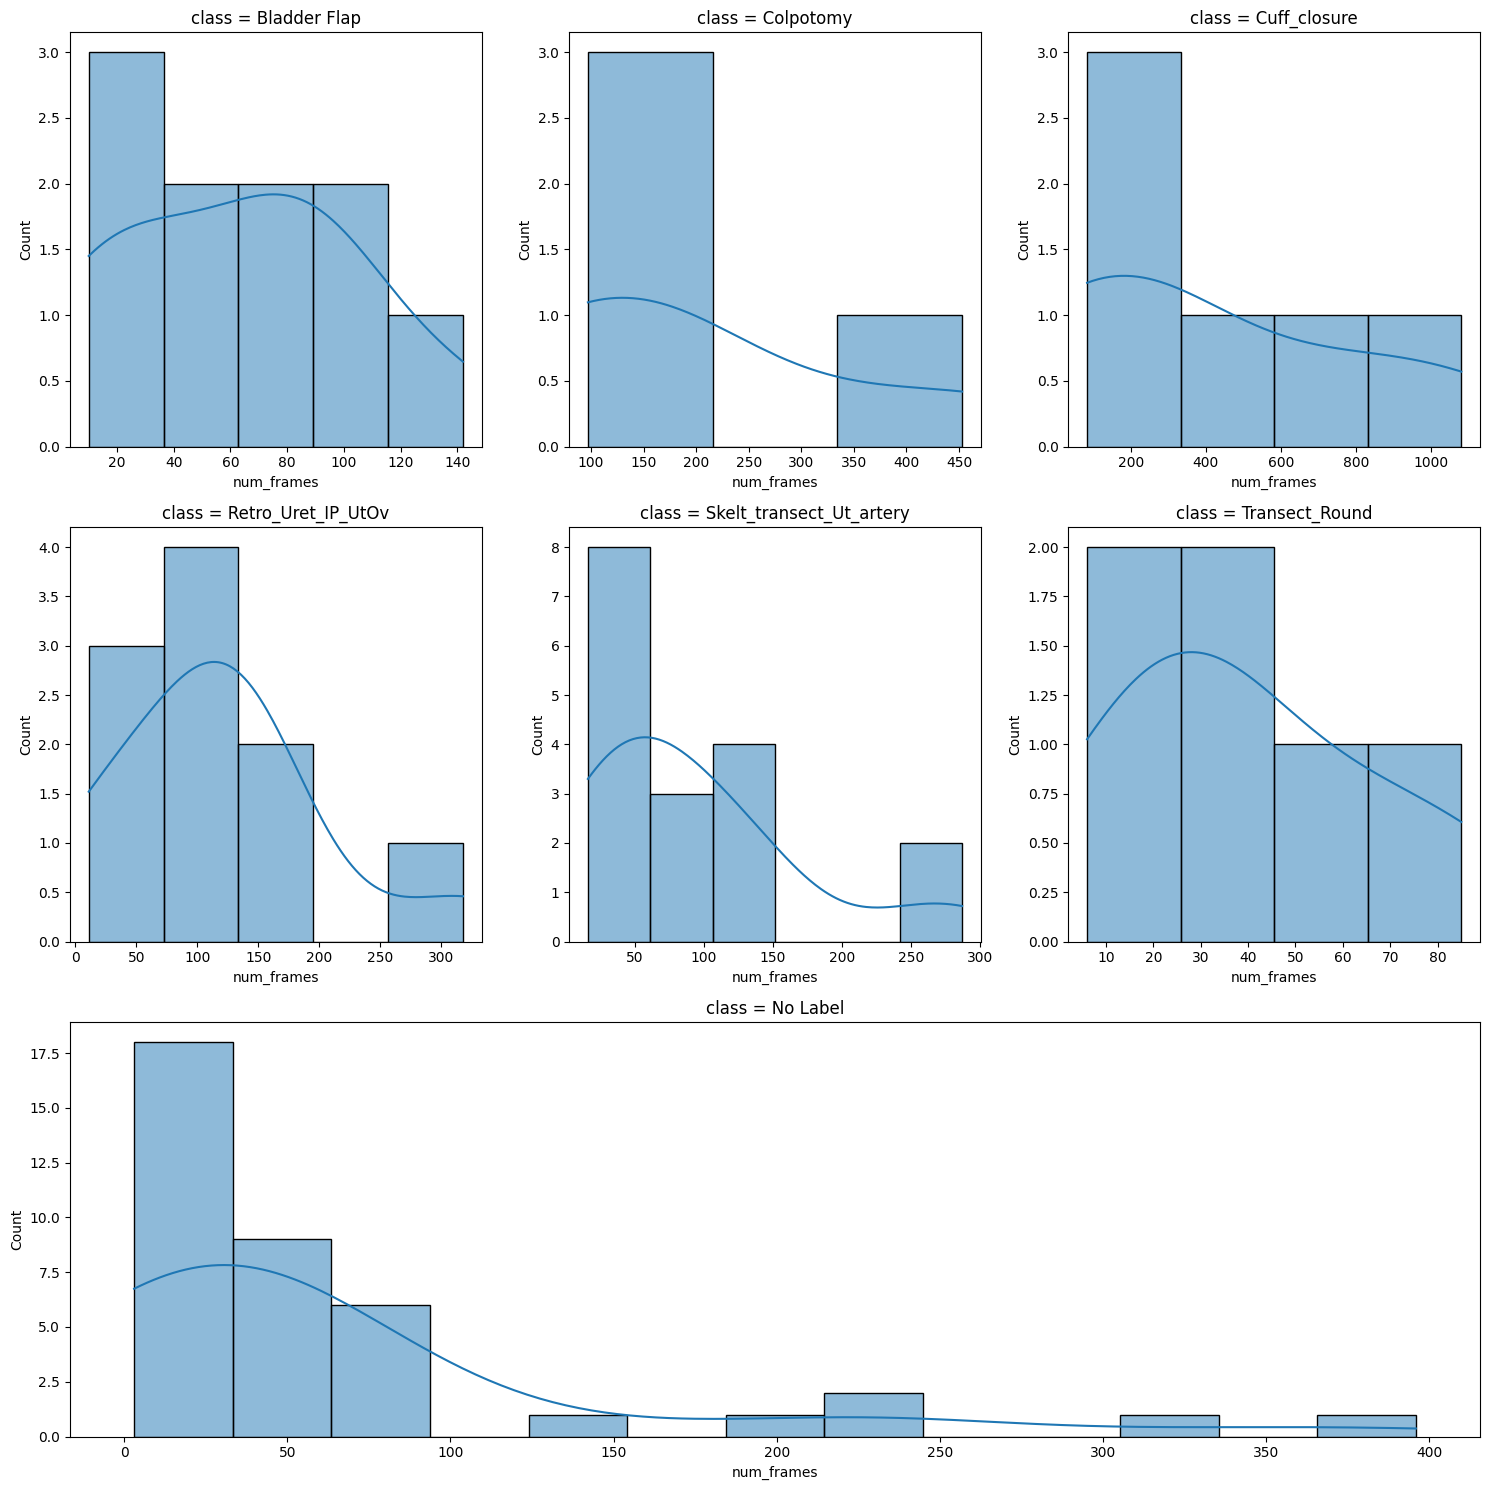

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import gridspec


unique_classes = df['class'].unique()
num_unique_classes = len(unique_classes)



num_columns = int(np.ceil(num_unique_classes / 3))

# Create a grid of subplots
# fig, axes = plt.subplots(3, num_columns, figsize=(num_columns * 5, 15))  # Adjust the figsize as needed

# Flatten the axes array for easy iteration
# axes = axes.flatten()

num_rows = (num_unique_classes + num_columns - 1) // num_columns  # Calculate rows, round up

# Plot each class in a separate subplot
fig = plt.figure(figsize=(15, num_rows * 5))
gs = gridspec.GridSpec(num_rows, num_columns)

j=0
# Plot each class in a separate subplot, except for the last one
for cls in unique_classes:  # Exclude the last class for now

    if cls != 'No Label':

        ax = plt.subplot(gs[j // num_columns, j % num_columns])
        subset = df[df['class'] == cls]
        sns.histplot(data=subset, x='num_frames', ax=ax, kde=True)
        ax.set_title(f'class = {cls}')
        j+=1

# Now, use the last row's last three columns for the last plot
ax_big = plt.subplot(gs[-1, :])
subset = df[df['class'] == 'No Label']
sns.histplot(data=subset, x='num_frames', ax=ax_big, kde=True)
ax_big.set_title(f'class = No Label')

# # Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     axes[j].set_visible(False)

# Adjust subplots to fit the figure area
plt.tight_layout()

# Show the plot
plt.show()


In [35]:
subset['length_video'].dtype

dtype('int64')

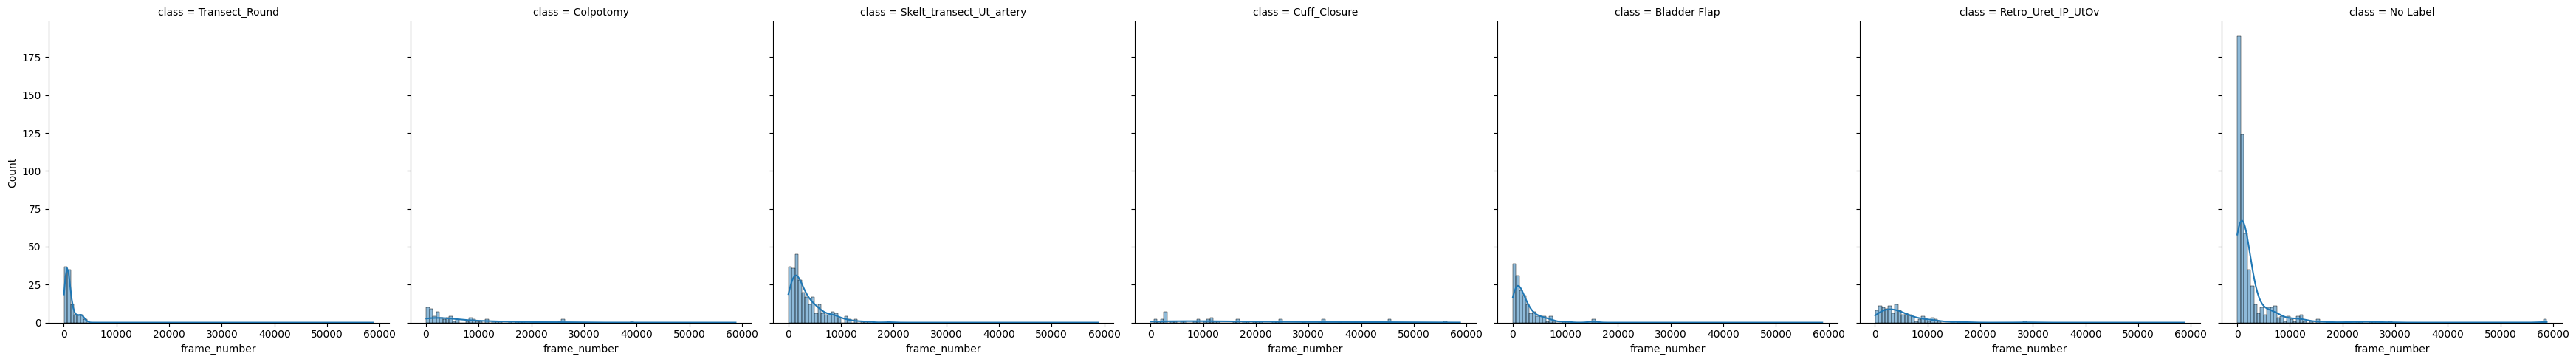

In [35]:
sns.displot(data=df_selected, x="frame_number", col="class", kde=True, height=5)

In [ ]:
name = ['train_train.csv', 'train_test.csv', 'test.csv']
mount_point = '/CMF/data/lumargot/hysterectomy/Clips_v3/'
csv = '/CMF/data/lumargot/hysterectomy/csv_files/v3/hyst_ds_' + name[2] 

In [1]:

def change_dataset_class_index(df_in, class_index, class_column):
    df = df_in.copy(deep=True)

    df.loc[df[class_column] == class_index, class_column] = 'A'
    df.loc[df[class_column] != 'A', class_column] = 'B'

    df.loc[df[class_column] == 'A', class_column] = 0
    df.loc[df[class_column] == 'B', class_column] = 1

    return df


In [2]:
import torch

preparing dataset for class: 0
preparing dataset for class: 1
preparing dataset for class: 2
preparing dataset for class: 3
preparing dataset for class: 4
preparing dataset for class: 5
preparing dataset for class: 6


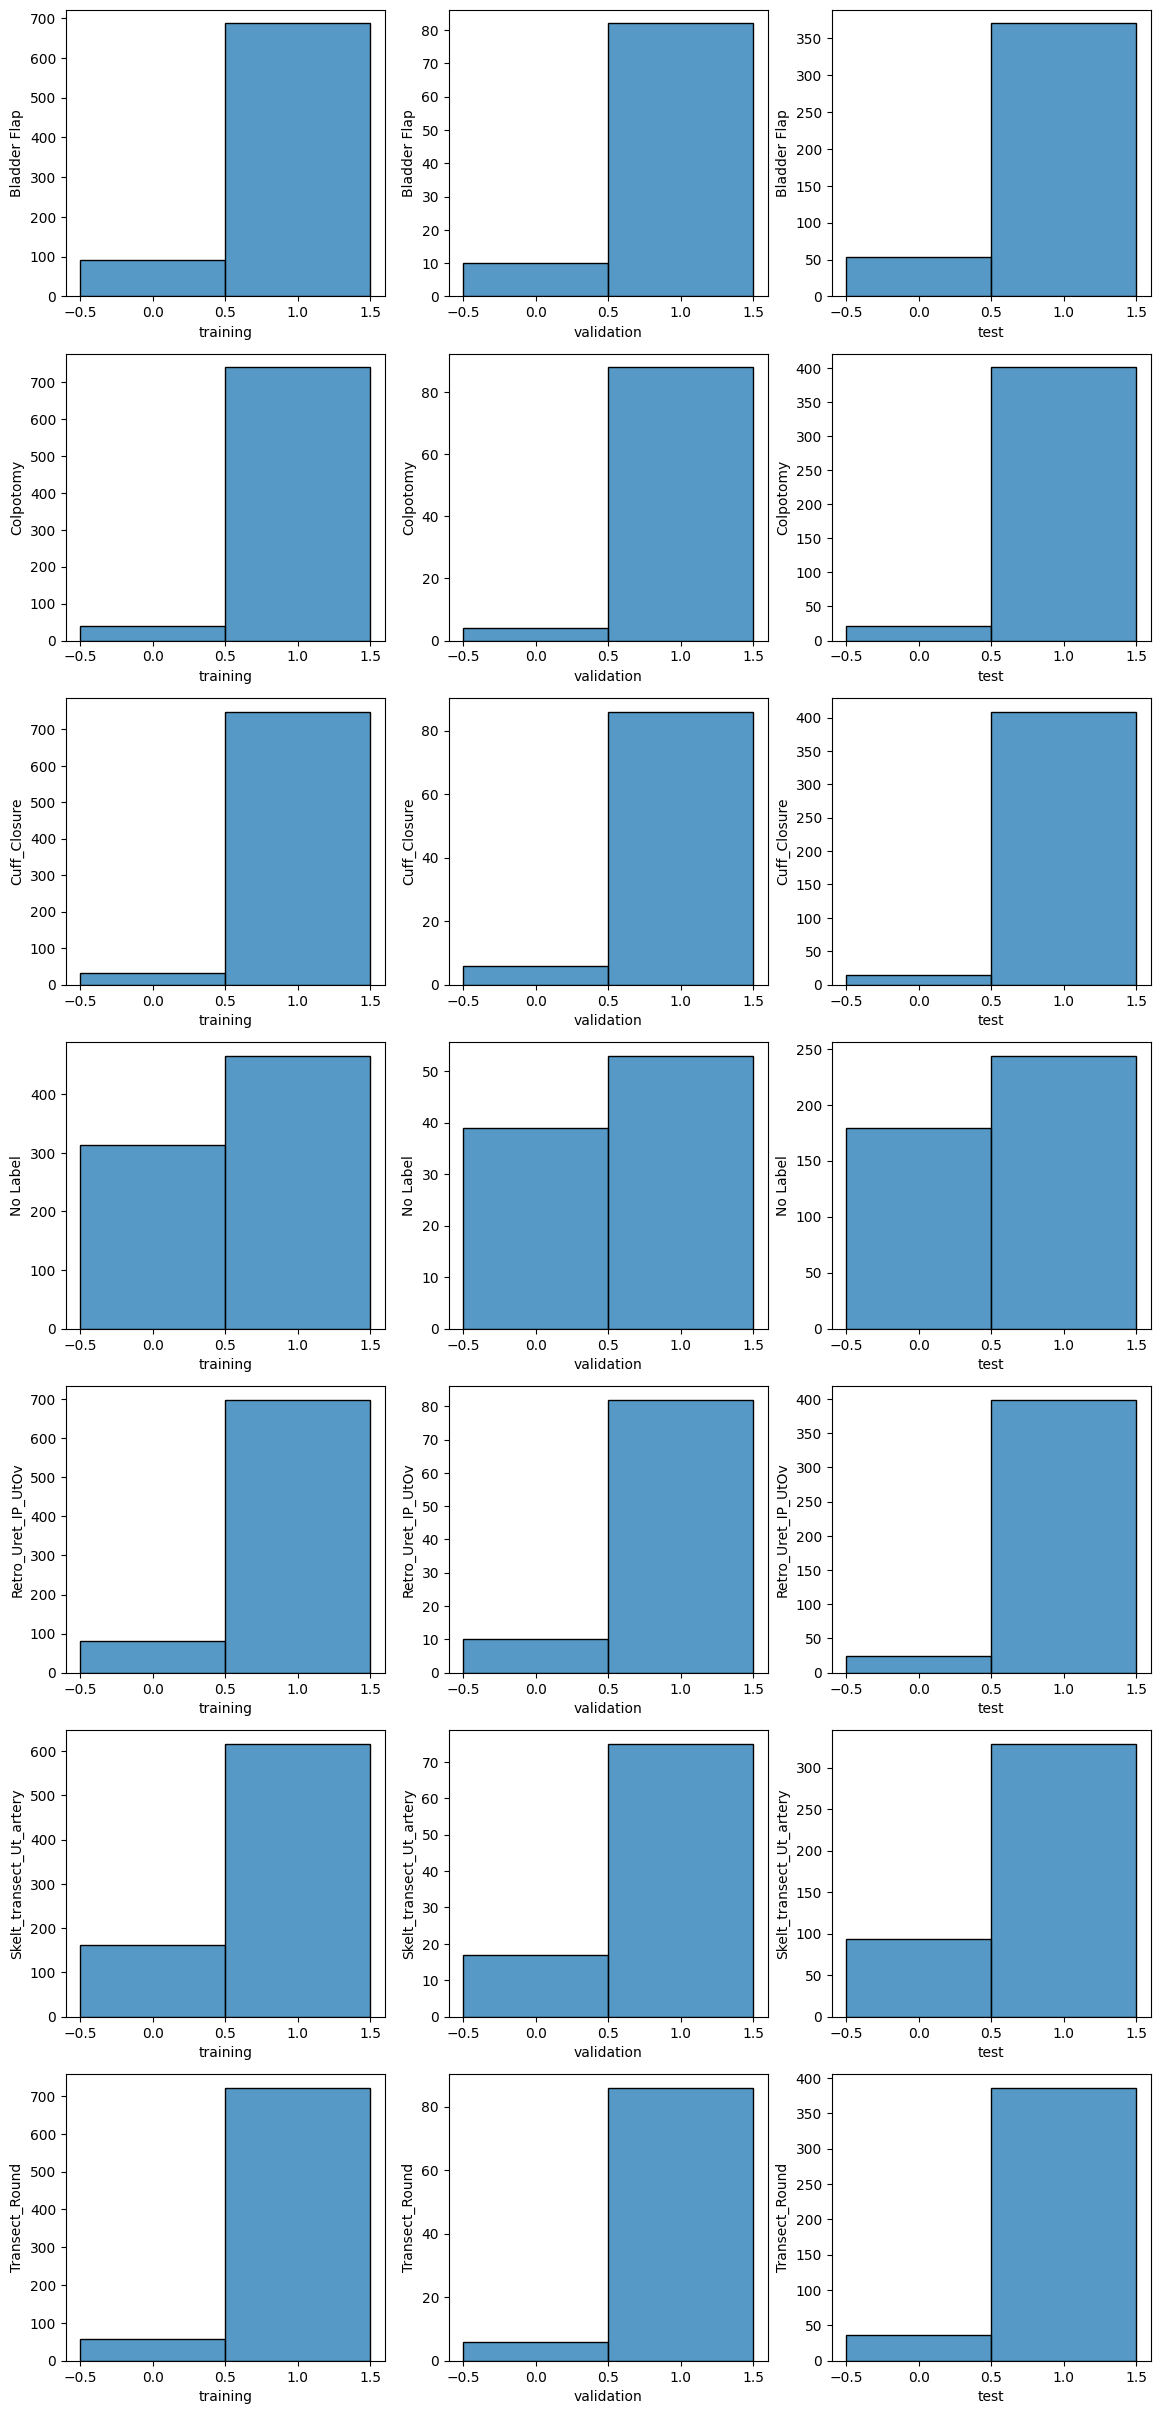

In [37]:
train_fn = '/CMF/data/lumargot/hysterectomy/csv_files/v3/hyst_ds_train_train.csv'
valid_fn = '/CMF/data/lumargot/hysterectomy/csv_files/v3/hyst_ds_train_test.csv'
test_fn = '/CMF/data/lumargot/hysterectomy/csv_files/v3/hyst_ds_test.csv'

df_train = pd.read_csv(train_fn)
df_val = pd.read_csv(valid_fn)
df_test = pd.read_csv(test_fn)

unique_classes = np.sort(np.unique(df_train['tag']))




# Plot each class in a separate subplot
fig = plt.figure(figsize=(7*2, 7*5))

plot_idx = 0
for class_index in unique_classes:

    print(f"preparing dataset for class: {class_index}")

    # prepare dataset for class_index vs. rest
    df_train_class = change_dataset_class_index(df_train, class_index, 'tag')
    df_val_class = change_dataset_class_index(df_val, class_index, 'tag')
    df_test_class = change_dataset_class_index(df_test, class_index, 'tag')

    label = df_train_class.loc[df_train_class['tag']== 0].iloc[0]['class']

    plot_idx += 3

    plt.subplot(8, 3, 1 + plot_idx)
    sns.histplot(data=df_train_class, x='tag', discrete=True)
    plt.xlabel('training')
    plt.ylabel(label)

    plt.subplot(8, 3, 2 + plot_idx)
    sns.histplot(data=df_val_class, x='tag', discrete=True)
    plt.xlabel('validation')
    plt.ylabel(label)

    plt.subplot(8, 3, 3 +plot_idx)
    sns.histplot(data=df_test_class, x='tag', discrete=True)
    plt.xlabel('test')
    plt.ylabel(label)


'Transect_Round'

In [9]:
df_train_class

,Unnamed: 0,vid_path,class,tag,num_frames,length_video,start,end
0,0,Bladder Flap/Hyst_BB_1.20.23a_Bladder Flap_113...,Bladder Flap,0,88,88,1137,1225
1,1,Bladder Flap/Hyst_BB_1.20.23b_Bladder Flap_141...,Bladder Flap,0,140,140,1417,1557
2,2,Bladder Flap/Hyst_BB_1.20.23b_Bladder Flap_170...,Bladder Flap,0,19,19,1709,1728
3,3,Bladder Flap/Hyst_BB_1.20.23b_Bladder Flap_172...,Bladder Flap,0,23,23,1728,1751
4,4,Bladder Flap/Hyst_BB_2.24.23_Bladder Flap_2340...,Bladder Flap,0,122,122,2340,2462
...,...,...,...,...,...,...,...,...
775,775,Transect_Round/Hyst_SurgU_3.21.23i_Transect_Ro...,Transect_Round,1,30,30,59,89
776,776,Transect_Round/Hyst_SurgU_3.21.23i_Transect_Ro...,Transect_Round,1,6,6,82,88
777,777,Transect_Round/Hyst_SurgU_3.21.23j_Transect_Ro...,Transect_Round,1,75,75,1343,1418
778,778,Transect_Round/Hyst_SurgU_3.21.23j_Transect_Ro...,Transect_Round,1,19,19,2466,2485


<Axes: xlabel='tag', ylabel='Count'>

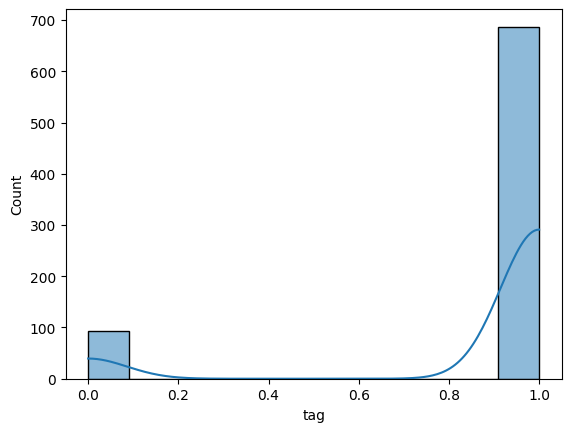